In [0]:
# You may not need this step if you libraries are up to date!
# Please install this package and restrate the notebook from Runtime menu (statsmodels)      
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels      

In [0]:
# for the stas model, it requires an update above
import statsmodels.formula.api  as smf
import statsmodels.api as sm
from patsy import dmatrix

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Arrayes and Data
import pandas as pd
import numpy as np

In [0]:
# ML Library
from sklearn.linear_model import LinearRegression

In [0]:
def Concave(x):
    return 1/(1+25*x**4)

# make example data
tmpx = np.linspace(-1,1,30)
y = Concave(tmpx) + np.random.normal(0, 0.2, len(tmpx))

In [9]:
Qaud_reg = PolynomialFeatures(degree =3)
X_Qaud    =Qaud_reg.fit_transform(tmpx[:,None])
#Qaud_reg.fit(X_Qaud,y)
lrQ = LinearRegression()
lrQ.fit(X_Qaud,y)
print(lrQ.coef_)

[ 0.          0.10421551 -0.89701384 -0.13805955]


In [10]:
# to to predict
#1- you need to transform the new raw data using our transformation model
#2- use the transformed data to get the new reponss

new_point = Qaud_reg.fit_transform(np.array([-0.5]).reshape(-1,1))
lrQ.predict(new_point)

array([0.56137963])

# Bining gives you a step functions
Binned regression does not create continuous functions of the predictor, so in most cases we would expect no relationship between the input and output.

In [12]:
# Show the data division
tmpxs = pd.Series(tmpx)

df_cut, bins = pd.cut(tmpxs, 2, retbins=True, right=True)
df_cut.value_counts()

(0.0, 1.0]       15
(-1.002, 0.0]    15
dtype: int64

In [13]:
#Better way is to use Pasty dmatrix to divide and set parameters
#patsy.dmatrix(formula_like, data={}, eval_env=0, NA_action='drop', return_type='matrix')

Ttmpx = dmatrix("bs(train, knots=[-0.5,  0, 0.5], degree=2, include_intercept=False)", {"train": tmpx},return_type='dataframe')
Ttmpx

,Intercept,"bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[0]","bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[1]","bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[2]","bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[3]","bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[4]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.247325,0.009512,0.000000,0.000000,0.000000
2,1.0,0.437574,0.038050,0.000000,0.000000,0.000000
3,1.0,0.570749,0.085612,0.000000,0.000000,0.000000
4,1.0,0.646849,0.152200,0.000000,0.000000,0.000000
5,1.0,0.665874,0.237812,0.000000,0.000000,0.000000
6,1.0,0.627824,0.342449,0.000000,0.000000,0.000000
7,1.0,0.532699,0.466112,0.000000,0.000000,0.000000
8,1.0,0.401902,0.592747,0.005351,0.000000,0.000000
9,1.0,0.287753,0.683115,0.029132,0.000000,0.000000


In [14]:
# Fitting Generalised linear models
SplineL = sm.GLM(y, Ttmpx).fit()
SplineL.conf_int ()

,0,1
Intercept,0.009902,0.535506
"bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[0]",-0.859964,0.055944
"bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[1]",0.397530,1.022724
"bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[2]",0.356248,1.081655
"bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[3]",-0.654958,0.097801
"bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)[4]",-0.456746,0.292413


In [0]:
# Predicting new examples, remember we need to do the same transformation of data

X_new = dmatrix("bs(train, knots=[-0.5, 0, 0.5], degree=2, include_intercept=False)",
                {"train": tmpx},return_type='dataframe')                                       
pred2 = SplineL.predict(X_new)


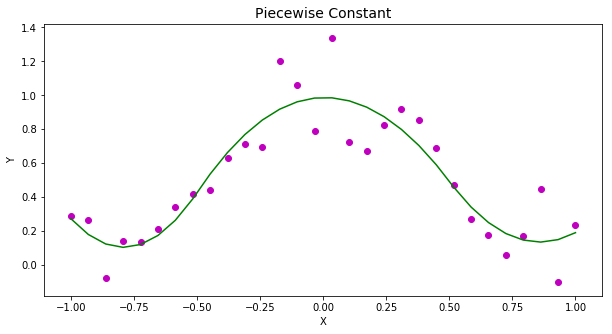

In [16]:
# Visualisation
plt.figure(figsize=(10,5))
plt.title('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
plt.scatter(tmpx, y, c='m')
plt.plot(tmpx, pred2, c='g')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()